In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire as a
import wrangle as w

In [5]:
amzn_df = a.get_data('amzn')
appl_df = a.get_data('appl')
nflx_df = a.get_data('nflx')
googl_df = a.get_data('googl')

In [8]:
amzn_df = w.wrangle_data('amzn')
appl_df = w.wrangle_data('appl')
nflx_df = w.wrangle_data('nflx')
googl_df = w.wrangle_data('googl')

In [16]:
am_train, am_val, am_test = w.split_data(amzn_df)
ap_train, ap_val, ap_test = w.split_data(appl_df)
nflx_train, nflx_val, nflx_test = w.split_data(nflx_df)
googl_train, googl_val, googl_test = w.split_data(googl_df)

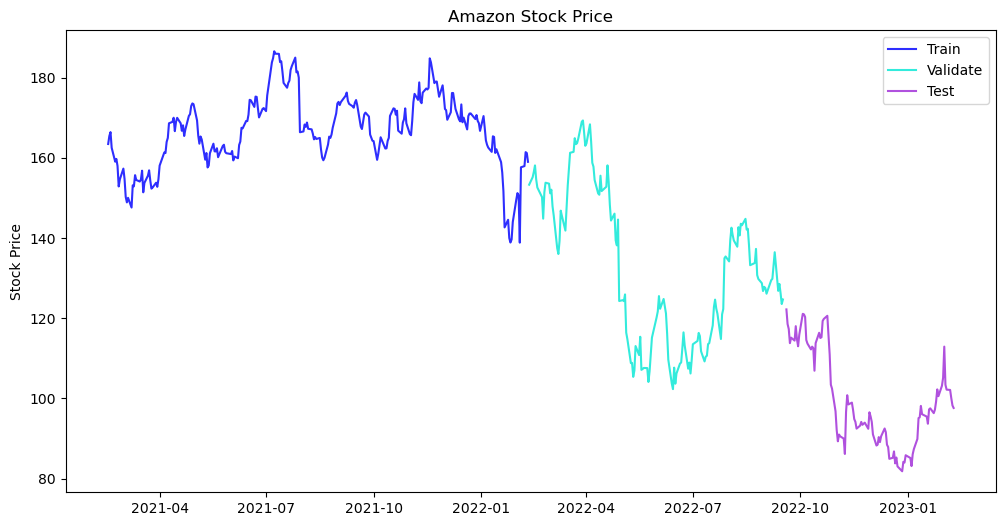

In [15]:
plt.figure(figsize=(12,6))
plt.plot(am_train.c, color='#2E2EFE', label = 'Train')
plt.plot(am_val.c, color='#33EBDC', label = 'Validate')
plt.plot(am_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Amazon Stock Price')
plt.show()
## Plotting the data to observe closing prices

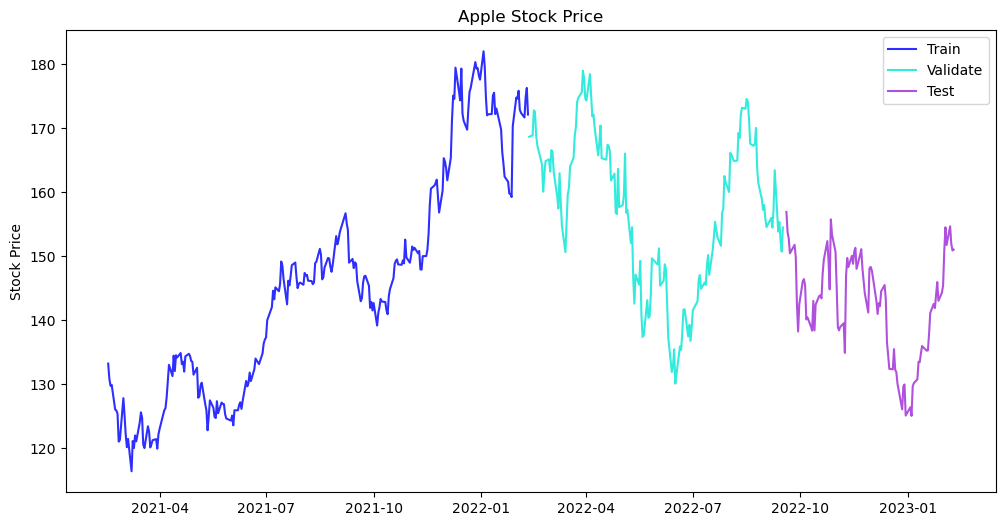

In [17]:
plt.figure(figsize=(12,6))
plt.plot(ap_train.c, color='#2E2EFE', label = 'Train')
plt.plot(ap_val.c, color='#33EBDC', label = 'Validate')
plt.plot(ap_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Apple Stock Price')
plt.show()
## Plotting the data to observe closing prices

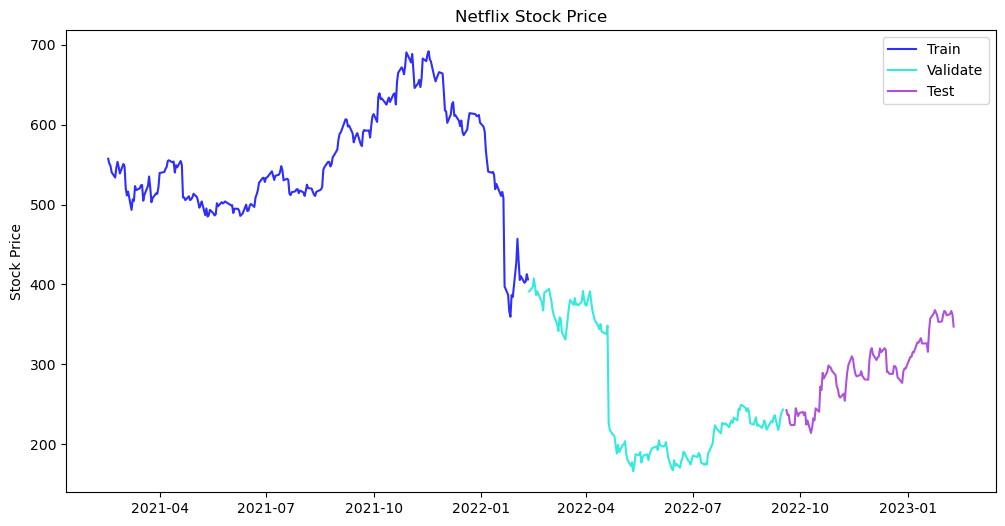

In [18]:
plt.figure(figsize=(12,6))
plt.plot(nflx_train.c, color='#2E2EFE', label = 'Train')
plt.plot(nflx_val.c, color='#33EBDC', label = 'Validate')
plt.plot(nflx_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Netflix Stock Price')
plt.show()
## Plotting the data to observe closing prices

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(googl_train.c, color='#2E2EFE', label = 'Train')
plt.plot(googl_val.c, color='#33EBDC', label = 'Validate')
plt.plot(googl_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Amazon Stock Price')
plt.show()
## Plotting the data to observe closing prices